In [1]:
from melconv import *
%matplotlib inline

In [2]:
dit=r'C:\Users\ADMIN\OneDrive - Shri Vile Parle Kelavani Mandal\Audio Data\for-2seconds\training\real'
#met=r'C:\Users\ADMIN\OneDrive - Shri Vile Parle Kelavani Mandal\Audio Data\melspectrograms\training\real/'
real_train=getdata(dit)
real_mel_train=real_train.data
real_mel_train[0]

No. of audio clips : 6978, Time taken : 57.167521715164185 seconds


array([[-12.867268 ,  -9.095801 ,  -6.6815414, ..., -41.249863 ,
        -32.861786 , -33.494934 ],
       [-26.004154 , -25.320038 , -22.3636   , ..., -33.3064   ,
        -22.841604 , -23.292604 ],
       [-28.476065 , -24.216356 , -20.482412 , ..., -35.658012 ,
        -30.892866 , -31.67419  ],
       ...,
       [-46.69422  , -44.447876 , -41.34427  , ..., -44.32923  ,
        -42.736298 , -42.831985 ],
       [-50.19462  , -56.198578 , -64.125534 , ..., -44.61151  ,
        -44.41153  , -46.145805 ],
       [-52.992867 , -58.987938 , -72.73     , ..., -50.24391  ,
        -48.363403 , -50.857826 ]], dtype=float32)

In [3]:
dit=r'C:\Users\ADMIN\OneDrive - Shri Vile Parle Kelavani Mandal\Audio Data\for-2seconds\training\fake'
#met=r'C:\Users\ADMIN\OneDrive - Shri Vile Parle Kelavani Mandal\Audio Data\melspectrograms\training\fake/'
fake_train=getdata(dit)
fake_mel_train=fake_train.data
fake_mel_train[0]

No. of audio clips : 6978, Time taken : 59.13473582267761 seconds


array([[-31.147326 , -10.3830185,  -1.9195671, ..., -11.545242 ,
        -17.165443 , -29.975153 ],
       [-30.791557 , -16.237888 ,  -6.477186 , ..., -19.458649 ,
        -27.185026 , -39.561615 ],
       [-40.224686 , -37.924706 , -33.90787  , ..., -17.624239 ,
        -27.729462 , -42.832    ],
       ...,
       [-43.874924 , -42.149292 , -43.798027 , ..., -46.448128 ,
        -45.856213 , -45.929596 ],
       [-46.313686 , -44.67928  , -47.32853  , ..., -49.030895 ,
        -41.758636 , -38.58574  ],
       [-53.445442 , -52.246307 , -55.26996  , ..., -56.927956 ,
        -46.334198 , -41.731567 ]], dtype=float32)

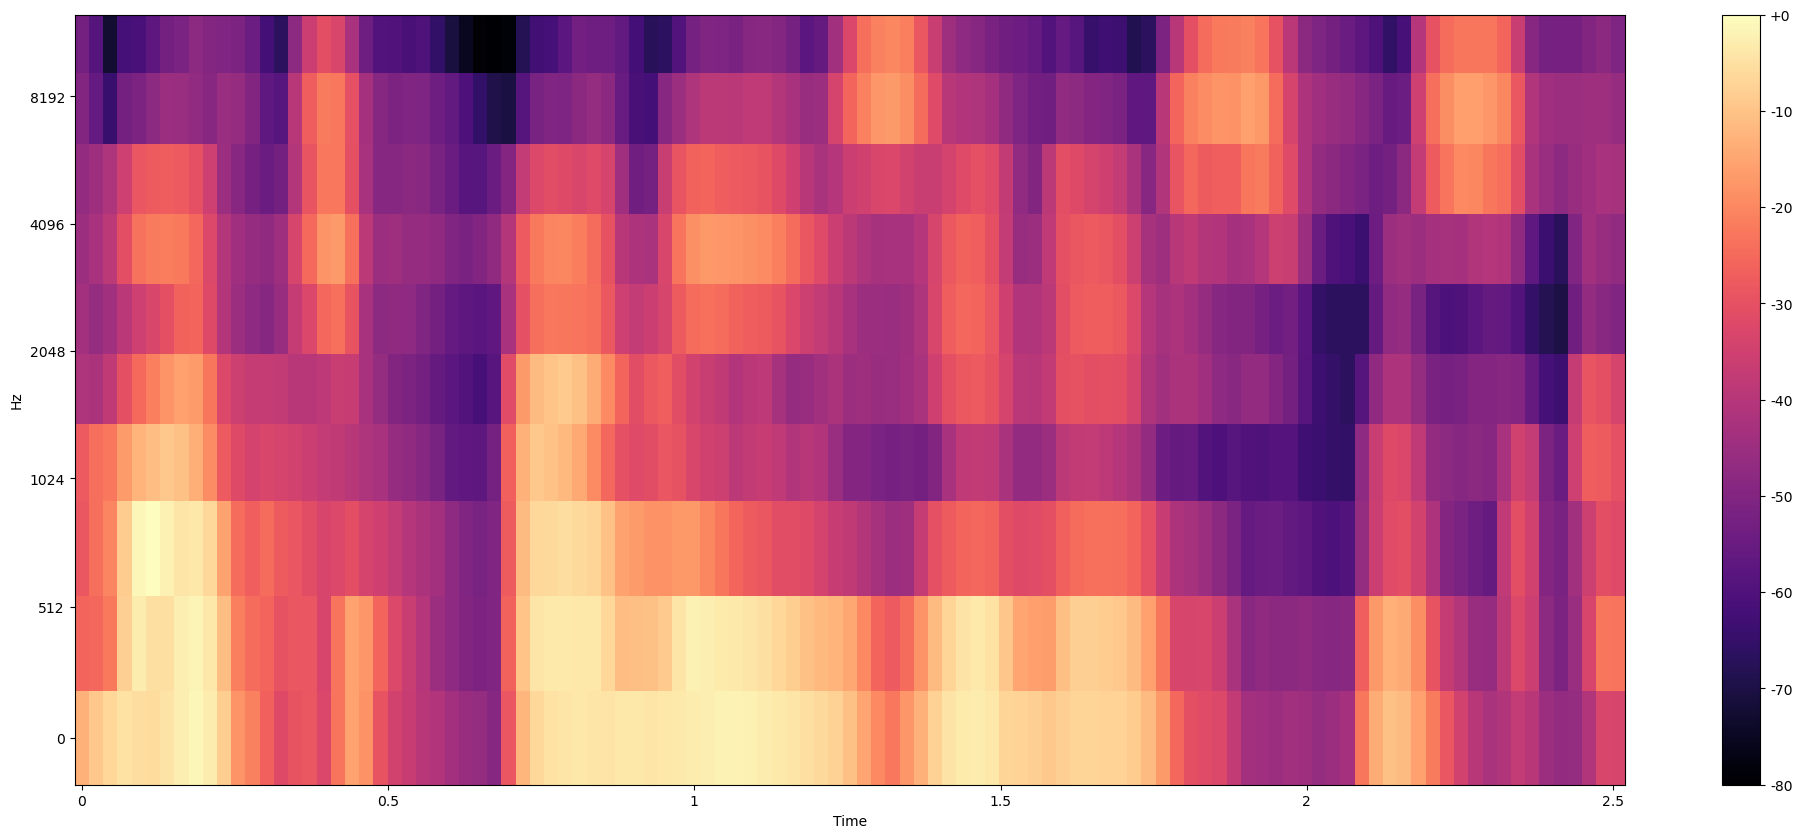

In [4]:
#Melspectrogram
plt.figure(figsize=(25,10))
librosa.display.specshow(real_mel_train[0],x_axis="time",y_axis="mel",sr=22050)
plt.colorbar(format="%+2.f")
plt.show()

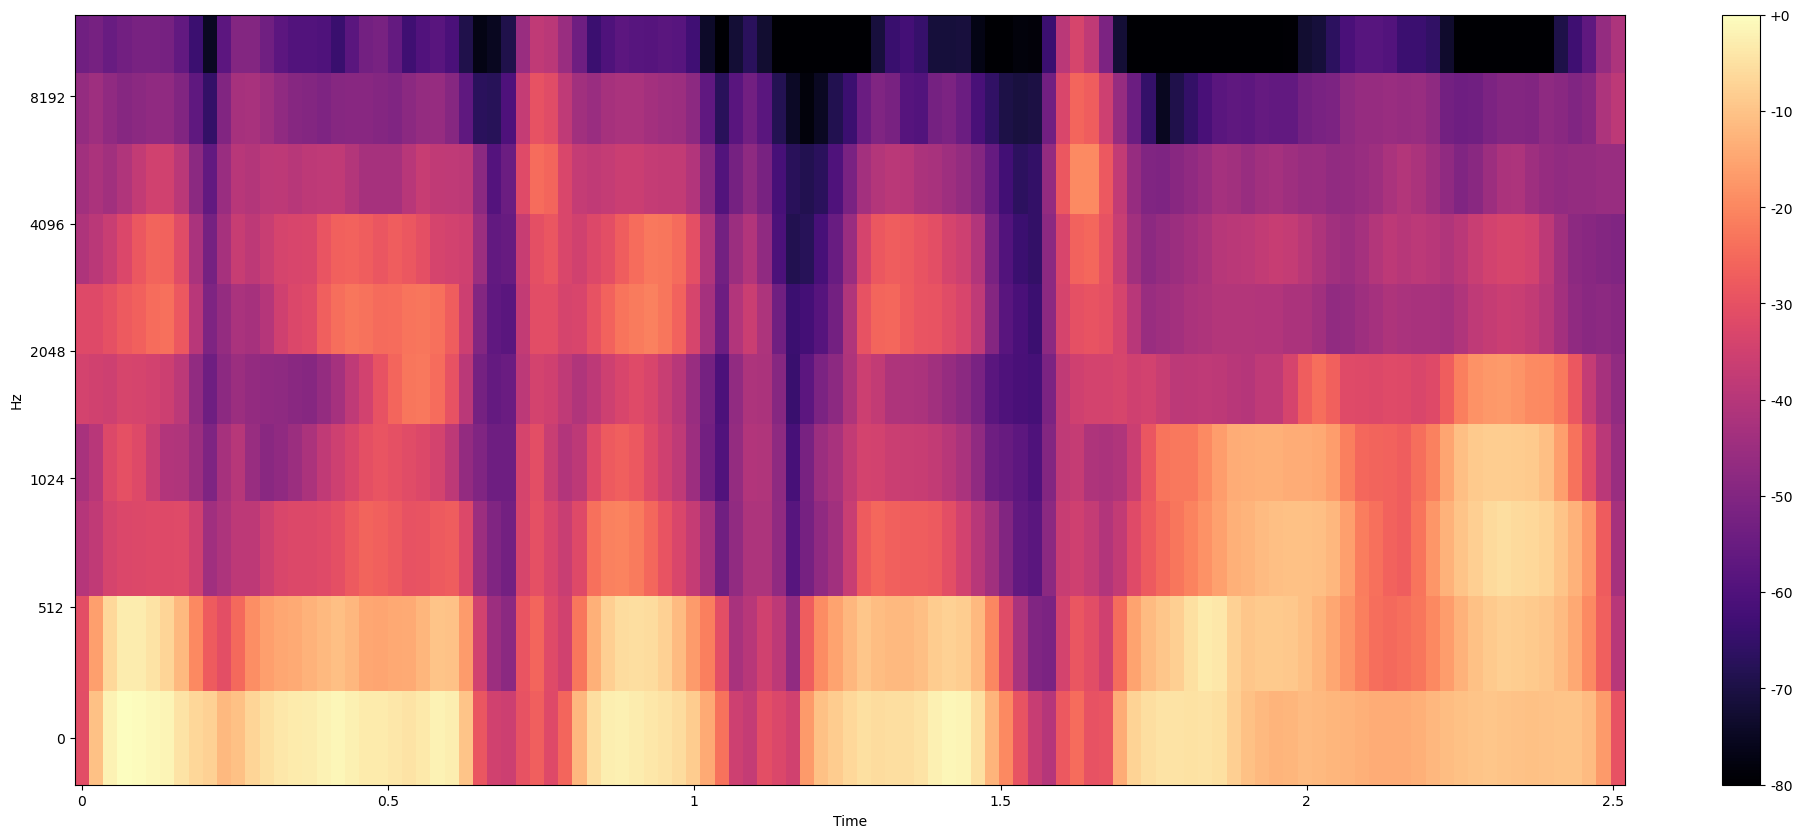

In [5]:
#Melspectrogram
plt.figure(figsize=(25,10))
librosa.display.specshow(fake_mel_train[0],x_axis="time",y_axis="mel",sr=22050)
plt.colorbar(format="%+2.f")
plt.show()

Text(200.97222222222223, 0.5, 'Amplitude')

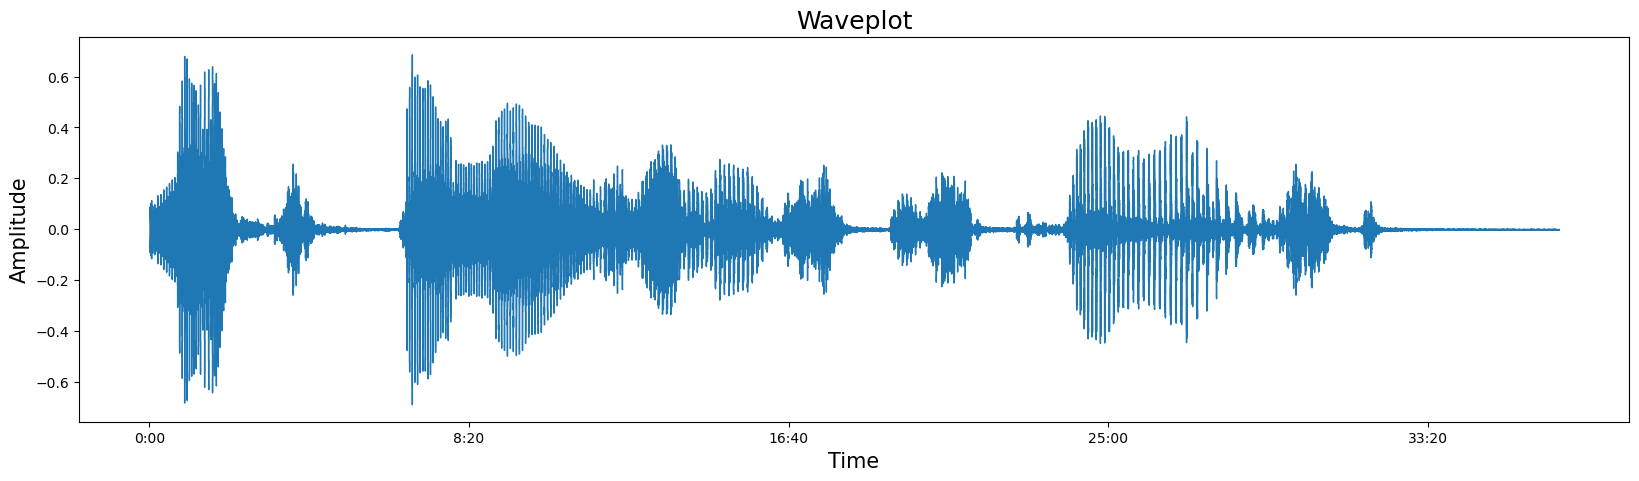

In [6]:
#Waveplot
plt.figure(figsize=(20,5)); sr=20
librosa.display.waveshow(real_train.waves[0],sr=sr)
plt.title('Waveplot',fontdict=dict(size=18))
plt.xlabel('Time',fontdict=dict(size=15))
plt.ylabel('Amplitude',fontdict=dict(size=15))

Text(192.09722222222223, 0.5, 'Amplitude')

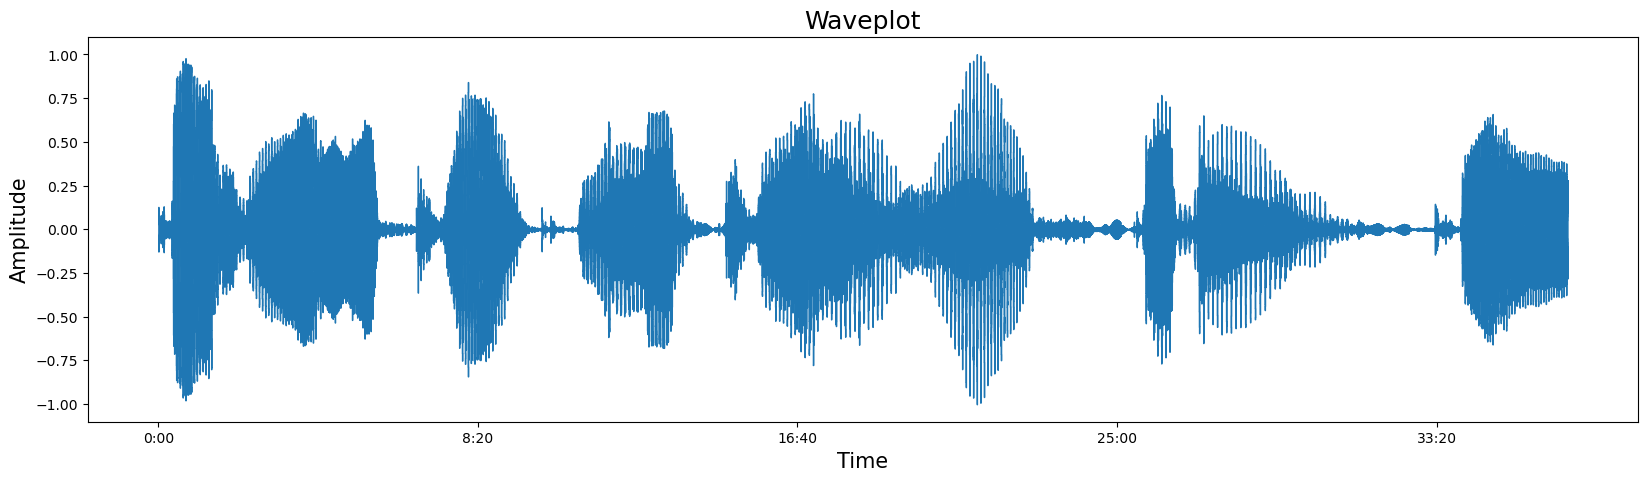

In [7]:
#Waveplot
plt.figure(figsize=(20,5)); sr=20
librosa.display.waveshow(fake_train.waves[0],sr=sr)
plt.title('Waveplot',fontdict=dict(size=18))
plt.xlabel('Time',fontdict=dict(size=15))
plt.ylabel('Amplitude',fontdict=dict(size=15))

In [8]:
md=prepdata(real_train,fake_train)
X_train,y_train=md.X,md.y

In [9]:
cd D:\Users\Leal\Desktop\MSc ASA\Semester 3\Data Driven Analytics - 3

D:\Users\Leal\Desktop\MSc ASA\Semester 3\Data Driven Analytics - 3


In [10]:
filelist=files_name(real_train,fake_train)
filelist.to_csv('Training Files.csv',index=False)

In [11]:
sptn=X_train.shape
sptn

(13956, 10, 109)

In [12]:
from tensorflow import keras
kt=keras.layers

In [13]:
model=keras.Sequential([
    kt.Flatten(input_shape=tuple(sptn[1:])),
    kt.Dense(100,activation='relu'),
    kt.Dense(100,activation='relu'),
    kt.Dense(100,activation='relu'),
    kt.Dense(1,activation='sigmoid'),
])

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
437/437 [==============================] - 6s 7ms/step - loss: 0.9941 - accuracy: 0.5765
Epoch 2/20
437/437 [==============================] - 3s 7ms/step - loss: 0.7189 - accuracy: 0.5877
Epoch 3/20
437/437 [==============================] - 3s 7ms/step - loss: 0.6628 - accuracy: 0.6237
Epoch 4/20
437/437 [==============================] - 3s 7ms/step - loss: 0.6717 - accuracy: 0.5609
Epoch 5/20
437/437 [==============================] - 3s 8ms/step - loss: 0.6935 - accuracy: 0.4963
Epoch 6/20
437/437 [==============================] - 3s 7ms/step - loss: 0.6920 - accuracy: 0.5018
Epoch 7/20
437/437 [==============================] - 4s 8ms/step - loss: 0.6932 - accuracy: 0.4987
Epoch 8/20
437/437 [==============================] - 3s 7ms/step - loss: 0.6933 - accuracy: 0.4948
Epoch 9/20
437/437 [==============================] - 3s 6ms/step - loss: 0.6933 - accuracy: 0.4976
Epoch 10/20
437/437 [==============================] - 3s 6ms/step - loss: 0.6932 - accuracy: 0.4999

In [16]:
#SVM Model

#from sklearn.svm import SVC  
#clf=SVC(kernel='linear') 

#X,y=prepfeat(real_train,fake_train)

#clf.fit(X,y)